# Seaborn
Es una libreria que construye encima de Matplotlib, la cual permite mejores estilos y se adapta correctamente a las librerias de Pandas

## 1 Lineas

In [1]:
import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np
import pandas as pd

#crearemos data
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
#rng.randn son 500 listas de 6 elemntos
#cumsum con axis=0 suma entre columnas (osea fila 1 con fila 2 con fila 3 y asi..)
y = np.cumsum(rng.randn(500, 6), axis=0)
#tendriamos 500 listas
# cada una con 6 elementos

No te preocupes mucho por como se genera `y`, solo combinamos random con sumar varias veces para obtener algo aleatorio mas bonito

para el Plot se Seaborn, cada una de las 500 listas es una medicion. Mientras que las columnas (osea el index de los elementos) son las propiedades, como 'Temperatura', 'Metros', et cetera

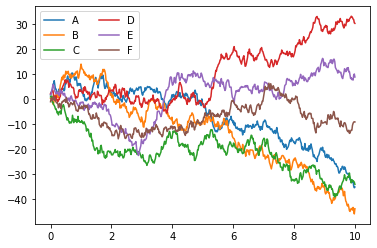

In [2]:
# Plot 1
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

### Implementar Seaborn
Para comenzar a usarlo solo debemos de definir que estamos usando el estilo de Seaborn antes de partir

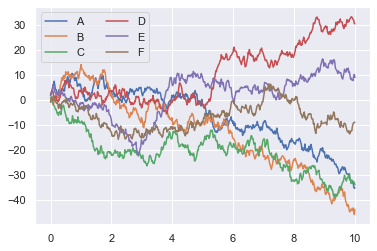

In [3]:
sns.set()
# Mismo grafico que el de arriba!
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

## 2 Densidades - sns.histplot( )
En estadistica varias veces se quiere ver la distribucion de una variable y otra, esto en matplotlib es asi:

In [4]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

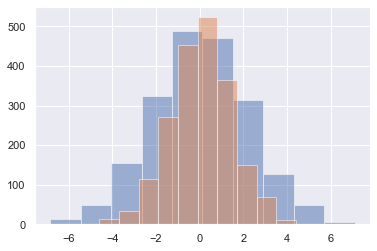

In [5]:

for col in 'xy':
    plt.hist(data[col], alpha=0.5)

### Seaborn a la obra
Si conoces estadistica, el problema de un histograma es que dependiendo de nuestro punto inicial el grafico cambiara radicalmente, teniendo aun los mismos datos. Podemos hacerlo mas suave y eliminar este problema

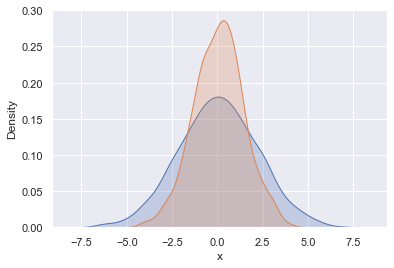

In [6]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

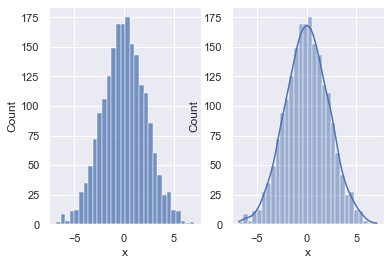

In [7]:
#aqui como hacer dos plots juntos
fig, (ax1, ax2) = plt.subplots(1,2)

sns.histplot(data["x"], ax=ax1) #default
sns.histplot(data["x"], kde=True, ax=ax2) #agrega una linea de 
plt.show()

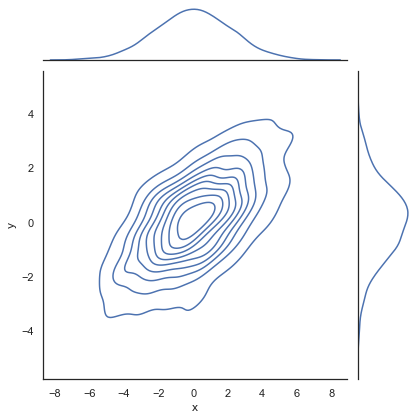

In [8]:
with sns.axes_style('white'):
    sns.jointplot(x="x",y= "y",data=data, kind='kde'); #prueba otros kind
    # kind : { "scatter" | "kde" | "hist" | "hex" | "reg" | "resid" }

Acabamos de crear varios Graficos utilizando las Bases; ahora pasaremos a seguir modificandolos. Todo lo siguiente se puede resumir en modificar el tamaño, agregar labels y titulos.

## sns.displot( )

In [16]:
# Para esta seccion usaremos un data set
penguins = sns.load_dataset("penguins") #nota: es un PandasDataFrame

In [12]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


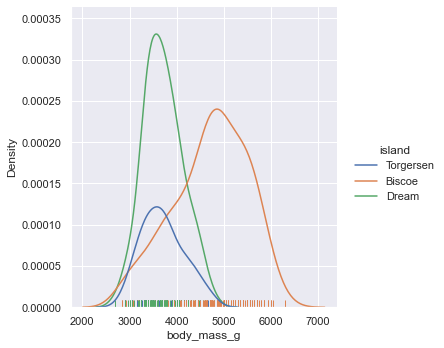

In [25]:
sns.displot(data=penguins, hue="island",x="body_mass_g", kind="kde", rug=True)

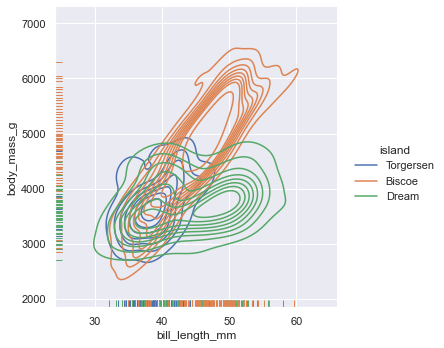

In [24]:
# displot permite usar "x" (1D) o x e y (2D), podemos utilizar la opcion kind
# y modificar el color usando una tabla de los datos
sns.displot(data=penguins, x="bill_length_mm", y="body_mass_g", hue="island",kind="kde", rug=True)

Tambien es posible escribir distribucion comulativas, osea ECDFS (Empirical Comulative Distribution Functions)

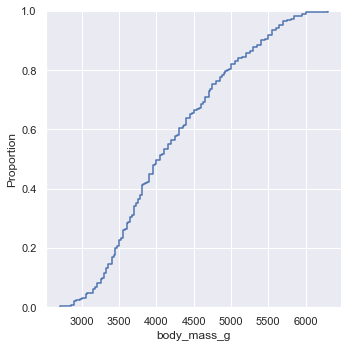

In [26]:
sns.displot(data=penguins, x="body_mass_g", kind="ecdf")
# Puedes ver como acaba en 1.0, eso represetna el 100%
# La probabilidad comulativa es util a la hora de trabajar con probabilidad en la teoria

Es posible hacer que un histograma se superponga sobre otro
`multiple="stack"`

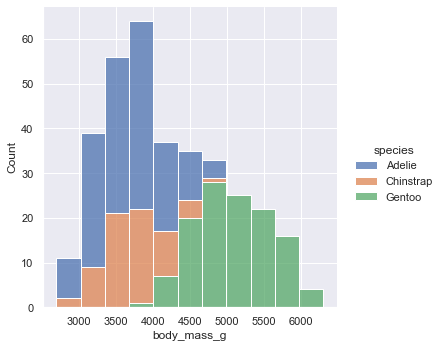

In [27]:
sns.displot(data=penguins, x="body_mass_g", hue="species", multiple="stack")


### Agregar otro apra datos de mas dimensiones `col=`
dado que tenemos varias especies de pinguinos, queremos ver la distribucion de Machos y Hembras por separado

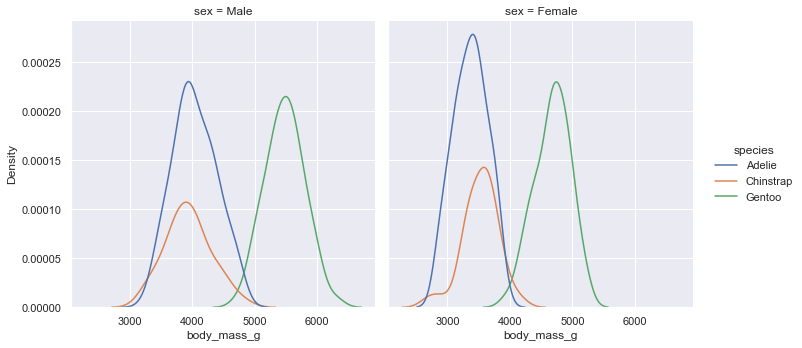

In [28]:
sns.displot(data=penguins, x="body_mass_g", hue="species", kind="kde", col="sex")

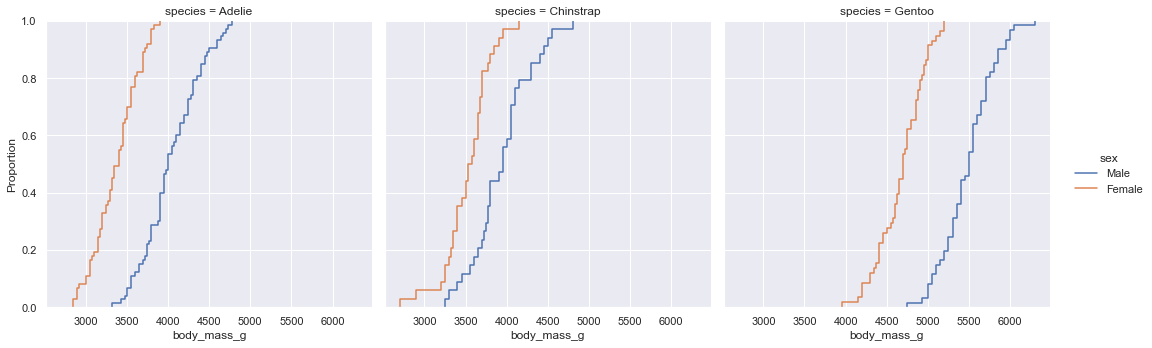

In [30]:
# y hecho de la manera inversa, que el color sea genero y la especie columnas
sns.displot(
    data=penguins, x="body_mass_g", hue="sex", kind="ecdf", col="species"
)

## 3. Axis y Titulos
Todo plot con `displot()` retorna un objeto `FacetGrid` el cual contiene `metodos` para customizarlo

In [ ]:
g = sns.displot(data=penguins, y="flipper_length_mm")